In [1]:
import json
import numpy as np
import networkx as nx

In [2]:
with open("../data/pos_traits_definitions.json") as f:
    pos_defs = json.load(f)
with open("../data/neg_traits_definitions.json") as f:
    neg_defs = json.load(f)
with open("../data/neut_traits_definitions.json") as f:
    neut_defs = json.load(f)

In [3]:
G=nx.Graph()
for item in pos_defs:
    for k, v in item.items():
        definitions = nx.Graph()
        definitions.add_node(k)
        for definition in v:    
            definitions.add_edge(k,definition)
        G.add_node(definitions)

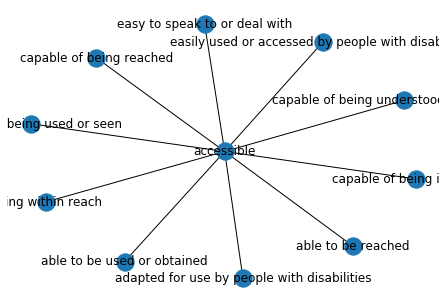

In [4]:
for n in list(G)[1:2]:
    nx.draw(n, with_labels=True)

In [5]:
count = 0

for grp in pos_defs:
    for k, v in grp.items():
        count = count + len(v)
for grp in neut_defs:
    for k, v in grp.items():
        count = count + len(v)
for grp in neg_defs:
    for k, v in grp.items():
        count = count + len(v)

print(count)

5783


In [6]:
def clean_defs(defs):
    """
    :param defs: a list of dicts. each dict's key is a term and each value is a list of definitions.
    """
    for item in defs:
        for k, v in item.items():
            clean_defs = list()
            for definition in v:    
                pass
                # TODO:
                # 1. if definition string contains more than 1 char, include string
                # 2. remove "and" if it appears at end of string
                # 3. remove "," if it appears at start of string
                # 4. if brackets that are not closed are found, delete string, flag out key (term) with erroneous
                # crawling output
                # 5.if last word in string is in ['the', 'a'], delete string
            

In [7]:
def count_nodefs(defs):
    empty_defs = list()
    for item in defs:
        for k, v in item.items():
            if len(v) == 0:
                empty_defs.append(k)
    return empty_defs

empty_defs = count_nodefs(neut_defs)
print(len(empty_defs))
print(empty_defs)
print(len(neut_defs))

30
['chummy', 'amusing', 'circumspect', 'contradictory', 'deceptive', 'droll', 'enigmatic', 'freewheeling', 'glamorous', 'high-spirited', 'guileless', 'irreverent', 'impressionable', 'noncompetitive', 'obedient', 'placid', 'retiring', 'restrained', 'skeptical', 'stylish', 'surprising', 'unambitious', 'unaggressive', 'unchanging', 'unfathomable', 'undemanding', 'unhurried', 'uninhibited', 'unpatriotic', 'unsentimental']
106


In [8]:
with open("../data/mit_ideonomy_traits.json") as f:
    mit_ideonomy_traits = json.load(f)
    
with open("../data/update.txt") as f:
    yihao_traits = f.readlines()

In [9]:
mit_set = set()
for key in mit_ideonomy_traits.keys():
    for trait in mit_ideonomy_traits[key]:
        mit_set.add(trait.lower())

In [10]:
yihao_set = set()
for trait in yihao_traits:
    yihao_set.add(trait.strip().lower())

In [11]:
common_set = mit_set & yihao_set
len(common_set)

164

In [12]:
union_set = mit_set | yihao_set
len(union_set)

1201

In [13]:
# with open('../data/union_of_mit_and_update.txt', 'a') as f:
#     for trait in union_set:
#         f.write(trait+'\n')

In [14]:
import pickle
with open("../data/graph.pickle",'rb') as f:
    trait_graph = pickle.load(f)
type(trait_graph)

networkx.classes.graph.Graph

In [15]:
len(trait_graph)

728

In [16]:
trait_graph["considerate"]

AtlasView({'inconsiderate': {'weight': -1}, 'thoughtful': {'weight': 1}})

In [17]:
# pull terms and definitions out from the definition files into a 
# more convenient dict format.
full_def_dict = dict()
for item in pos_defs:
    for term, definitions in item.items():
        full_def_dict[term] = definitions
for item in neg_defs:
    for term, definitions in item.items():
        full_def_dict[term] = definitions
for item in neut_defs:
    for term, definitions in item.items():
        full_def_dict[term] = definitions        

In [18]:
len(pos_defs) + len(neut_defs) + len(neg_defs)

611

In [19]:
full_def_dict["considerate"]

['marked by or given to careful',
 'showing kindness toward other people',
 'thinking about the rights and feelings of other people',
 'thoughtful of the rights and feelings of others']

In [29]:
def find_parens(s):
    toret = {}
    pstack = []

    for i, c in enumerate(s):
        if c == '(':
            pstack.append(i)
        elif c == ')':
            if len(pstack) == 0:
                raise IndexError("No matching closing parens at: " + str(i))
            toret[pstack.pop()] = i

    if len(pstack) > 0:
        raise IndexError("No matching opening parens at: " + str(pstack.pop()))
    return toret

# clean definitions.
clean_defs_dict = dict()
for term, defs in full_def_dict.items():
    clean_defs = list()
    for d in defs: 
        # 1. if definition string contains more than 1 char, include string
        if len(d) > 1:
            new_d = d
        else:
            continue
        
        # 2. remove "and" if it appears at end of string
        if type(new_d) == str:
            and_index = new_d.find('and')
            if and_index > 0 and and_index+3 == len(d) - 1:
                new_d = new_d[:and_index]

        # 3. remove "," if it appears at start of string
        comma_index = new_d.find(',')
        if comma_index > -1 and comma_index < 2:
            new_d = new_d[comma_index+1:]            
        
        # 4. if brackets that are not closed are found, delete string, flag out key (term) with erroneous
        # crawling output
        try: 
            find_parens(new_d)
        except IndexError:
            new_d = None    
        
        # 5.if last word in string is in ['the', 'a'], delete string
        the_index = d.find(' the')
        if the_index > 0 and the_index+4 == len(d) - 1:
            new_d = None
        a_index = d.find(' a')
        if a_index > 0 and a_index+2 == len(d) - 1:
            new_d = None
        
        if new_d != None:
            clean_defs.append(new_d)
        else:
            print(term)
            print(d)
    clean_defs_dict[term] = clean_defs

articulate
teeth) on an
articulate
to arrange (
charismatic
a member of a religious group or movement that stresses the seeking of direct divine inspiration and charisms (such as
charismatic
or healing)
clean
to make clean: such as
constant
something invariable or unchanging: such as
deep
) or pitch range
deep
having a low musical pitch (see
deep
other than the marks (see
deep
thrown or hit deep (see
dynamic
a dynamic force (see
dynamic
of or relating to dynamics (see
educated
having an
Focused
) of a beam of particles (such as electrons)
Focused
a point of convergence (see
Focused
to direct or cause to direct at
fair
something that is fair or fortunate (see
gentle
) birth or status
gentle
a person of gentle (see
friendly
: such as
honest
) manner
honest
in a genuine or honest (see
humble
) in spirit or manner
humble
to make (someone) humble (see
independent
not dependent: such as
liberal
a member or supporter of a liberal political party (see
liberal
a person who is liberal: such as
n

In [30]:
def count_defs(def_dict):
    count = 0
    for k, v in def_dict.items():
        count = count + len(v)
    return count

In [31]:
print(count_defs(full_def_dict))
print(count_defs(clean_defs_dict))

5707
5463


In [35]:
# inspect clean_defs_dict
keys_list = list(clean_defs_dict.keys())
print(keys_list[5])
display(clean_defs_dict[keys_list[0]])

amiable


['an',
 'asserting that the person or thing represented by the grammatical subject performs the action represented by the verb',
 'capable of',
 'capable of controlling',
 'characterized by',
 'characterized by emission of large amounts of electromagnetic energy',
 'characterized or accomplished by action or effort',
 'currently erupting or likely to erupt',
 'disposed to action',
 'doing things that require physical movement and energy',
 'engaged in an action or activity',
 'engaged in full-time service especially in the armed forces',
 'engaged or participating in action or activity',
 'exhibiting optical',
 'expressing action as distinct from mere existence or state',
 'functioning by the emission of',
 'having practical operation or results',
 'involved in the activities of a group or organization',
 'involving action or participation',
 'marked by present operation, transaction, movement, or use',
 'marked by vigorous',
 'moving down the line',
 'one engaged in an action or activ

In [25]:
# construct "full" graph by adding definitions into trait_graph.
for term, defs in full_def_dict.items():
    if term in trait_graph:
        for definition in defs:
            trait_graph.add_edge(term, definition, weight=1)  # we regard a definition relation as an entailment relation.

In [36]:
# save dictionary of definitions of traits in the trait_graph.
common_trait_dict = dict()  # common between mit ideonomy set and yihao's trait graph.
for term, defs in full_def_dict.items():
    if len(defs) > 0 and term in trait_graph:
        common_trait_dict[term] = defs

with open("../data/common_traits_dict.json", 'w') as f:
    json.dump(common_trait_dict, f)

In [38]:
with open("../data/common_traits_dict.json", 'r') as f:
    tmp = json.load(f)
print(tmp.keys())
print(len(tmp))

dict_keys(['active', 'adventurous', 'amiable', 'benevolent', 'agreeable', 'calm', 'challenging', 'compassionate', 'clever', 'considerate', 'cheerful', 'confident', 'cooperative', 'courteous', 'cultured', 'creative', 'curious', 'decent', 'dynamic', 'earnest', 'ebullient', 'energetic', 'fair', 'faithful', 'flexible', 'forthright', 'generous', 'gallant', 'friendly', 'genuine', 'gracious', 'honest', 'imaginative', 'humorous', 'honorable', 'intelligent', 'intuitive', 'liberal', 'magnanimous', 'kind', 'logical', 'mature', 'neat', 'open', 'orderly', 'passionate', 'practical', 'precise', 'popular', 'rational', 'reliable', 'responsible', 'sane', 'serious', 'sociable', 'shrewd', 'skillful', 'strong', 'sporting', 'sympathetic', 'tidy', 'wise', 'venturesome', 'witty', 'warm', 'youthful', 'anxious', 'assertive', 'argumentative', 'blunt', 'callous', 'childish', 'careless', 'confused', 'crazy', 'cowardly', 'critical', 'crude', 'difficult', 'dirty', 'cynical', 'desperate', 'dishonest', 'disorderly', '

In [98]:
#nx.draw(trait_graph)

In [99]:
path = input("enter path to save pickled graph:\n")
nx.write_gpickle(trait_graph, path)

enter path to save pickled graph:
 ../data/graph2.pickle


In [100]:
chosen_term = "practical"
print(trait_graph[chosen_term])

{'impractical': {'weight': -1}, 'useful': {'weight': 1}, 'actively engaged in some course of action or occupation': {'weight': 1}, 'an examination in which students have to do or make something to show what they have learned': {'weight': 1}, 'an examination requiring demonstration of some practical skill': {'weight': 1}, 'appropriate or suited for actual use': {'weight': 1}, 'being such in practice or effect': {'weight': 1}, 'capable of being put to use': {'weight': 1}, 'capable of being put to use or account': {'weight': 1}, 'concerned with voluntary action and ethical decisions': {'weight': 1}, 'designed to supplement theoretical training by experience': {'weight': 1}, 'disposed to action as opposed to speculation or abstraction': {'weight': 1}, 'likely to succeed and reasonable to do or use': {'weight': 1}, 'not theoretical or ideal': {'weight': 1}, 'of or relating to real action rather than ideas or thought': {'weight': 1}, 'of, relating to, or manifested in': {'weight': 1}, 'or ac

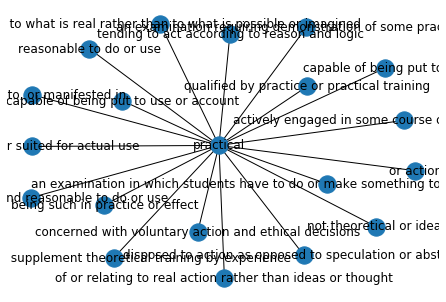

In [103]:
# construct 2 new graphs of two directly connected terms and their definitions,
# and visualise them.
G1 = nx.Graph()
for edge in trait_graph[chosen_term].keys():
    #print(trait_graph[random_term][edge])
    if 'relation' in trait_graph[chosen_term][edge]:
        G1.add_edge(chosen_term, edge, relation='defined as')
nx.draw(G1, with_labels=True)

In [105]:
for edge in trait_graph[chosen_term].keys():
    #print(trait_graph[random_term][edge])
    if 'weight' in trait_graph[chosen_term][edge]:
        term2 = edge
        break
print(term2)
print(trait_graph[chosen_term][term2]['weight'])

impractical
-1


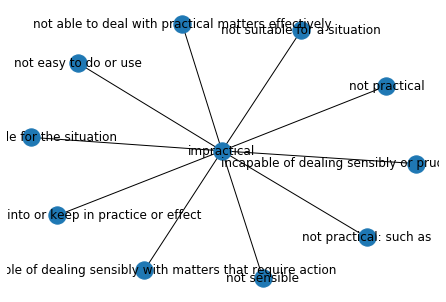

In [106]:
G2 = nx.Graph()
for edge in trait_graph[term2].keys():
    #print(trait_graph[random_term][edge])
    if 'relation' in trait_graph[term2][edge]:
        G2.add_edge(term2, edge, relation='defined as')
nx.draw(G2, with_labels=True)

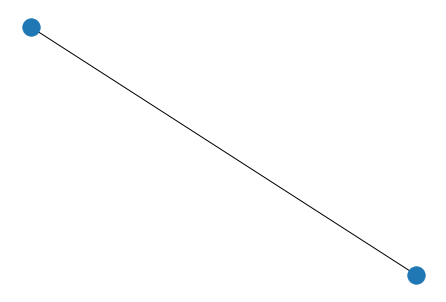

In [107]:
aggregate_graph = nx.Graph()
aggregate_graph.add_edge(G1, G2, weight=trait_graph[chosen_term][term2]['weight'])
nx.draw(aggregate_graph, with_labels=True)